In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from utide._ut_constants import ut_constants as utide
import os
from utils import *
import pandas as pd
import cartopy.feature as cfeature
from scipy.ndimage import gaussian_filter
from palette import * 
from glob import iglob
from netCDF4 import Dataset
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# useful variables
j=np.complex(0,1)
cpd=2.*np.pi/86400. # from cpd to radian/s
crs = ccrs.PlateCarree() # cartopy


#datadir = './'
datadir = '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient'
graphdir = '/home3/homedir7/perso/cgonzale/IWAVE/figures/'
bathy = '/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc'
datadir_tides = '/home2/pharos/othr/aponte/tides/HRET/'
datadir_tides2 = '/home2/pharos/othr/aponte/tides/FES2014/'
# tmp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

palette = '/home3/homedir7/perso/cgonzale/IWAVE/script/palette/medspiration.rgb'
csst = getColorMap( rgbFile = palette )

In [2]:
#Find available files
rootdir_glob = datadir+ '**/*'
file_list = [f for f in iglob(rootdir_glob, recursive=True) if os.path.isfile(f)]
print(file_list)

['/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_03.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_04.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_08.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_05.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_11.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_09.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_01.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_07.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_02.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_12.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gr

In [3]:
#order file_list chronologically (from January to December)
file_list.sort()
print(file_list)

['/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_01.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_02.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_03.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_04.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_05.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_06.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_07.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_08.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_09.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_10.nc', '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gr

In [4]:
#read and merge all files
ds = [xr.open_dataset(f) for f in file_list]

In [5]:
dum =[ds[m].month for m in range(len(file_list))]

In [6]:
print(dum)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


In [7]:
print(ds[0])

<xarray.Dataset>
Dimensions:                 (lat: 2048, lon: 4096)
Coordinates:
  * lon                     (lon) float32 -179.95605 -179.86816 -179.78027 ...
  * lat                     (lat) float32 89.956055 89.868164 89.78027 ...
Data variables:
    clim_maxi_sst_gradient  (lat, lon) float64 ...
    clim_src                (lat, lon) float64 ...
Attributes:
    title:    Max Frontal Gradient from URI Pathfinder 9 km frontal database ...
    month:    01


In [8]:
file_list

['/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_01.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_02.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_03.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_04.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_05.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_06.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_07.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_08.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_09.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_maxi_sst_gradient_K_per_km_10.nc',
 '/home/lervily/cgonzale/data/IWSST/maxi_sst_gradient/clim_m

In [9]:
enumerate?

In [10]:
ds =[ xr.open_dataset(f) for f in file_list] 
print(ds)

[<xarray.Dataset>
Dimensions:                 (lat: 2048, lon: 4096)
Coordinates:
  * lon                     (lon) float32 -179.95605 -179.86816 -179.78027 ...
  * lat                     (lat) float32 89.956055 89.868164 89.78027 ...
Data variables:
    clim_maxi_sst_gradient  (lat, lon) float64 ...
    clim_src                (lat, lon) float64 ...
Attributes:
    title:    Max Frontal Gradient from URI Pathfinder 9 km frontal database ...
    month:    01, <xarray.Dataset>
Dimensions:                 (lat: 2048, lon: 4096)
Coordinates:
  * lon                     (lon) float32 -179.95605 -179.86816 -179.78027 ...
  * lat                     (lat) float32 89.956055 89.868164 89.78027 ...
Data variables:
    clim_maxi_sst_gradient  (lat, lon) float64 ...
    clim_src                (lat, lon) float64 ...
Attributes:
    title:    Max Frontal Gradient from URI Pathfinder 9 km frontal database ...
    month:    02, <xarray.Dataset>
Dimensions:                 (lat: 2048, lon: 4096)
Coo

In [11]:

for i,j in enumerate(ds):
    ds[i] = j.expand_dims('time_month')
    ds[i]['time_month']=('time_month',[int(j.month)])

print(ds)

[<xarray.Dataset>
Dimensions:                 (lat: 2048, lon: 4096, time_month: 1)
Coordinates:
  * lon                     (lon) float32 -179.95605 -179.86816 -179.78027 ...
  * lat                     (lat) float32 89.956055 89.868164 89.78027 ...
  * time_month              (time_month) int64 1
Data variables:
    clim_maxi_sst_gradient  (time_month, lat, lon) float64 nan nan nan nan ...
    clim_src                (time_month, lat, lon) float64 nan nan nan nan ...
Attributes:
    title:    Max Frontal Gradient from URI Pathfinder 9 km frontal database ...
    month:    01, <xarray.Dataset>
Dimensions:                 (lat: 2048, lon: 4096, time_month: 1)
Coordinates:
  * lon                     (lon) float32 -179.95605 -179.86816 -179.78027 ...
  * lat                     (lat) float32 89.956055 89.868164 89.78027 ...
  * time_month              (time_month) int64 2
Data variables:
    clim_maxi_sst_gradient  (time_month, lat, lon) float64 nan nan nan nan ...
    clim_src         

In [12]:
ds2 = xr.auto_combine(ds, concat_dim='time_month')
print(ds2)


<xarray.Dataset>
Dimensions:                 (lat: 2048, lon: 4096, time_month: 12)
Coordinates:
  * lon                     (lon) float32 -179.95605 -179.86816 -179.78027 ...
  * lat                     (lat) float32 89.956055 89.868164 89.78027 ...
  * time_month              (time_month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    clim_maxi_sst_gradient  (time_month, lat, lon) float64 nan nan nan nan ...
    clim_src                (time_month, lat, lon) float64 nan nan nan nan ...


In [13]:
lonb=(30, 130)
latb=(-40, 0)
if lonb is not None:
    # should handle 360 wrapping
    ds2_region = ds2.where(ds2['lon']>=lonb[0], drop=True)
    ds2_region = ds2_region.where(ds2_region['lon']<=lonb[1], drop=True)
if latb is not None:
    # should check conventions for longitude
    ds2_region = ds2_region.where(ds2_region['lat']>=latb[0], drop=True)
    ds2_region = ds2_region.where(ds2_region['lat']<=latb[1], drop=True)

In [14]:
mean_max_clim = ds2_region['clim_maxi_sst_gradient'].mean('time_month').persist()

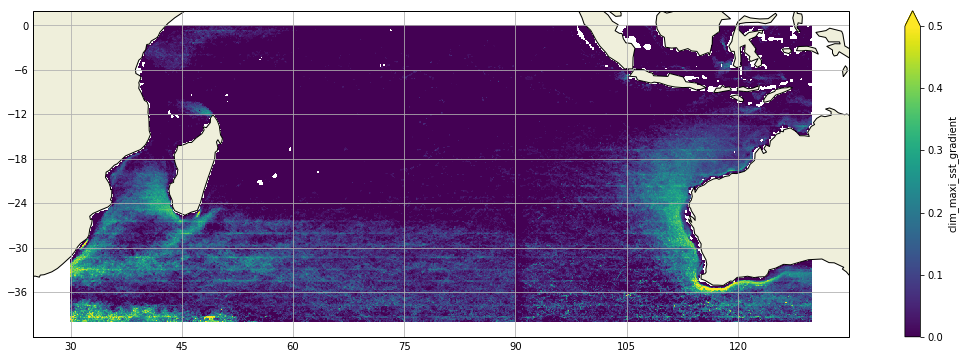

In [15]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection=crs)

mean_max_clim.plot(vmax=0.5)
gl = ax.gridlines(crs=crs, draw_labels=True) 
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
ax.add_feature(cfeature.LAND)


In [16]:
#read tides
hret, constituents, omega = get_hret_ssh(constituents=['M2'], lonb=lonb, latb=latb, hret=datadir_tides+'/Carrere_HRET_testing.nc',bathy=bathy)


M2 omega=1.405189e-04 rad/s, 1.932 cpd
/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc


In [17]:
U, V, constituents, omega = get_hret_uv(constituents=['M2','K1'], lonb=lonb, latb=latb, hret=datadir_tides+'/Carrere_HRET_testing.nc', bathy=bathy)

K1 omega=7.292116e-05 rad/s, 1.003 cpd
M2 omega=1.405189e-04 rad/s, 1.932 cpd
/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc
7.292116514526208e-05


In [18]:

#fig = plt.figure(figsize=(36, 20))
def make_cartopy(nrow,ncol,projection=ccrs.PlateCarree(), fig=plt.figure(), resolution='100m',nfig=1,Month_text=None):
    ax = fig.add_subplot(nrow,ncol,nfig,projection=projection)
    ax.coastlines(resolution=resolution, color='k')
    ax.add_feature(cfeature.LAND, facecolor = '0.75')
    #ax.gridlines(draw_labels = True)
    if type(Month_text) is str:
        ax.set_title(Month_text)
    gl = ax.gridlines(crs=projection, draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Only PlateCarree and Mercator plots are currently supported.
    return ax

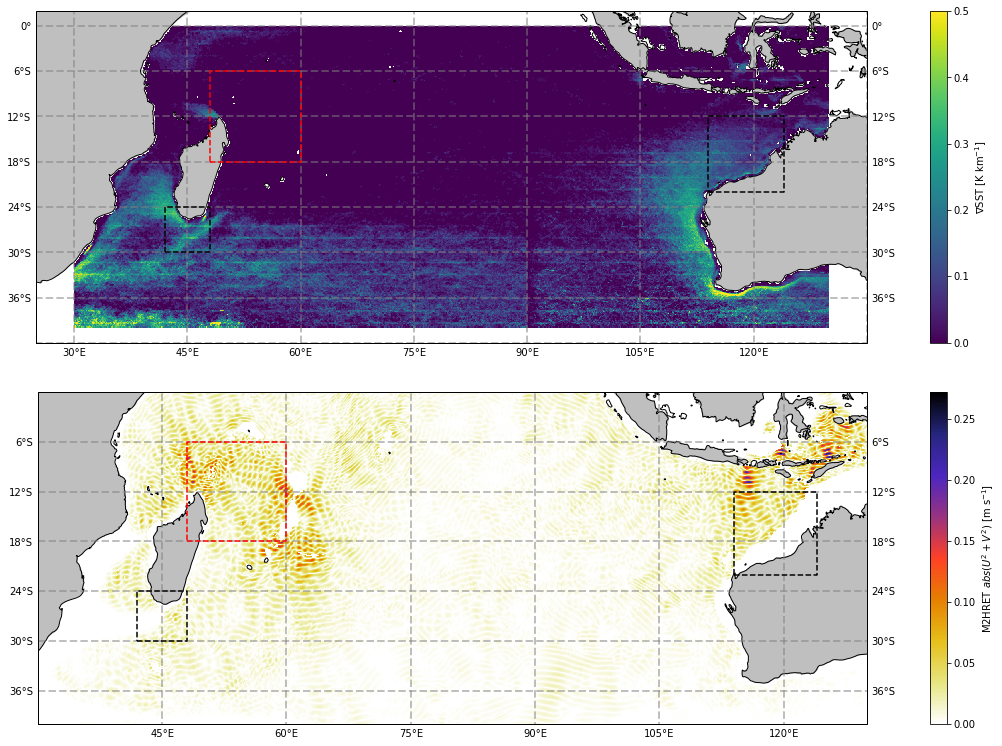

In [19]:
vmax_grad=0.5
img_extent = (lonb[0], lonb[1], latb[0], latb[1])
cst='M2'
hc=1000

#define regions to plot
latmin = -30
latmax = -24
lonmin = 42
lonmax = 48
# Draw the rectangular extent of the second plot on the first:
x = [lonmin, lonmax, lonmax, lonmin, lonmin]
y = [latmin, latmin, latmax, latmax, latmin]

latmin = -22 #-14,-13
latmax = -12#-12, -7
lonmin =  114#52,49
lonmax =  124#55,53
# Draw the rectangular extent of the second plot on the first:
x_aust = [lonmin, lonmax, lonmax, lonmin, lonmin]
y_aust = [latmin, latmin, latmax, latmax, latmin]

latmin = -18 #-14,-13
latmax = -6#-12, -7
lonmin =  48#52,49
lonmax =  60#55,53

x_mozamb4 = [lonmin, lonmax, lonmax, lonmin, lonmin]
y_mozamb4 = [latmin, latmin, latmax, latmax, latmin]


fig = plt.figure(figsize=(18,12))
ax = make_cartopy(2,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1)
#cs = ax.imshow(mean_max_clim, extent=img_extent, transform=ccrs.PlateCarree(), vmax = vmax_grad)
cs=ax.pcolormesh(mean_max_clim.lon,mean_max_clim.lat,mean_max_clim, vmax=vmax_grad,cmap = plt.get_cmap('viridis'))
ax.plot(x, y, transform=ccrs.PlateCarree(), color='k',linestyle='dashed')
ax.plot(x_aust, y_aust, transform=ccrs.PlateCarree(), color='k',linestyle='dashed')
ax.plot(x_mozamb4, y_mozamb4, transform=ccrs.PlateCarree(), color='red',linestyle='dashed')
cbar = fig.colorbar(cs, ax=ax)
cbar.set_label(r'$\nabla$SST [K km$^{-1}$]')

ax = make_cartopy(2,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=2)
toplt_U = np.sqrt(V[cst].real**2+V[cst].real**2)
toplt_U = toplt_U.where(hret['h']>hc)
cs = ax.imshow(toplt_U, origin='lower', extent=img_extent, transform=ccrs.PlateCarree(),cmap = plt.get_cmap('CMRmap_r'))
ax.plot(x, y, transform=ccrs.PlateCarree(), color='k',linestyle='dashed')
ax.plot(x_aust, y_aust, transform=ccrs.PlateCarree(), color='k',linestyle='dashed')
ax.plot(x_mozamb4, y_mozamb4, transform=ccrs.PlateCarree(), color='red',linestyle='dashed')
#toplt.plot()
#ax.set_title(cst+r'HRET $abs(U^2+V^2)$')
cbar = fig.colorbar(cs, ax=ax)
cbar.set_label(cst+r'HRET $abs(U^2+V^2)$ [m s$^{-1}$]')
plt.subplots_adjust(left=0.01,right=0.99,hspace=0.15,wspace=0.05,top=0.95)
plt.savefig(graphdir+os.sep+'Case_studies_gradSST_hret_uv_amplitude_map_M2.png')

In [20]:
ds2_JFM = ds2['clim_maxi_sst_gradient'].isel(time_month=[0,1,2])
print(ds2_JFM[0])



<xarray.DataArray 'clim_maxi_sst_gradient' (lat: 2048, lon: 4096)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon         (lon) float32 -179.95605 -179.86816 -179.78027 -179.69238 ...
  * lat         (lat) float32 89.956055 89.868164 89.78027 89.69238 89.60449 ...
    time_month  int64 1
Attributes:
    long_name:          maximum frontal gradient
    units:              K/km
    URI_frequency_min:  10.0
    URI_scale_factor:   2.0
    CMS_frequency_min:  0.0
    CMS_scale_factor:   1.0
    comment:            URI or CMS climatology


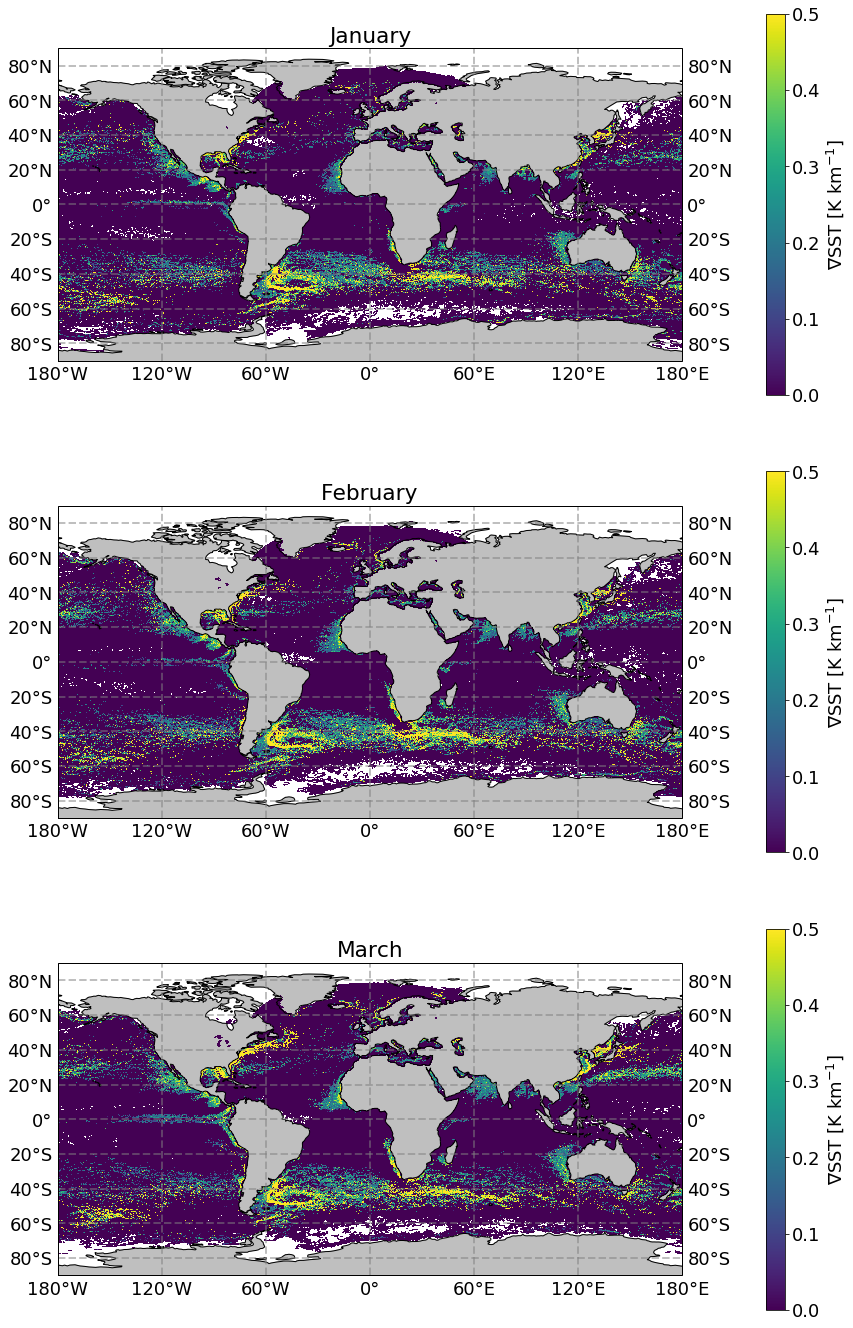

In [21]:
matplotlib.rcParams.update({'font.size':18})
str_month = ['January','February','March']#,'April','May','June','July','August','September','October','November','December']
fig = plt.figure(figsize=(13,20))
#plot SST
for i in range(3):
    ax = make_cartopy(3,1,projection=ccrs.PlateCarree(), fig=fig, resolution='110m',nfig=(i+1),Month_text = str_month[i] )
    cs=ax.pcolormesh(ds2_JFM.lon,ds2_JFM.lat,ds2_JFM[i], vmax=vmax_grad,cmap = plt.get_cmap('viridis'))
    cbar = fig.colorbar(cs, ax=ax,pad=0.1)
    cbar.set_label(r'$\nabla$SST [K km$^{-1}$]')
plt.subplots_adjust(left=0.1,right=0.99,wspace=0.05,top=0.95, bottom =0.05)
plt.savefig(graphdir+'Atlas_SST_gradient_JFM.png')


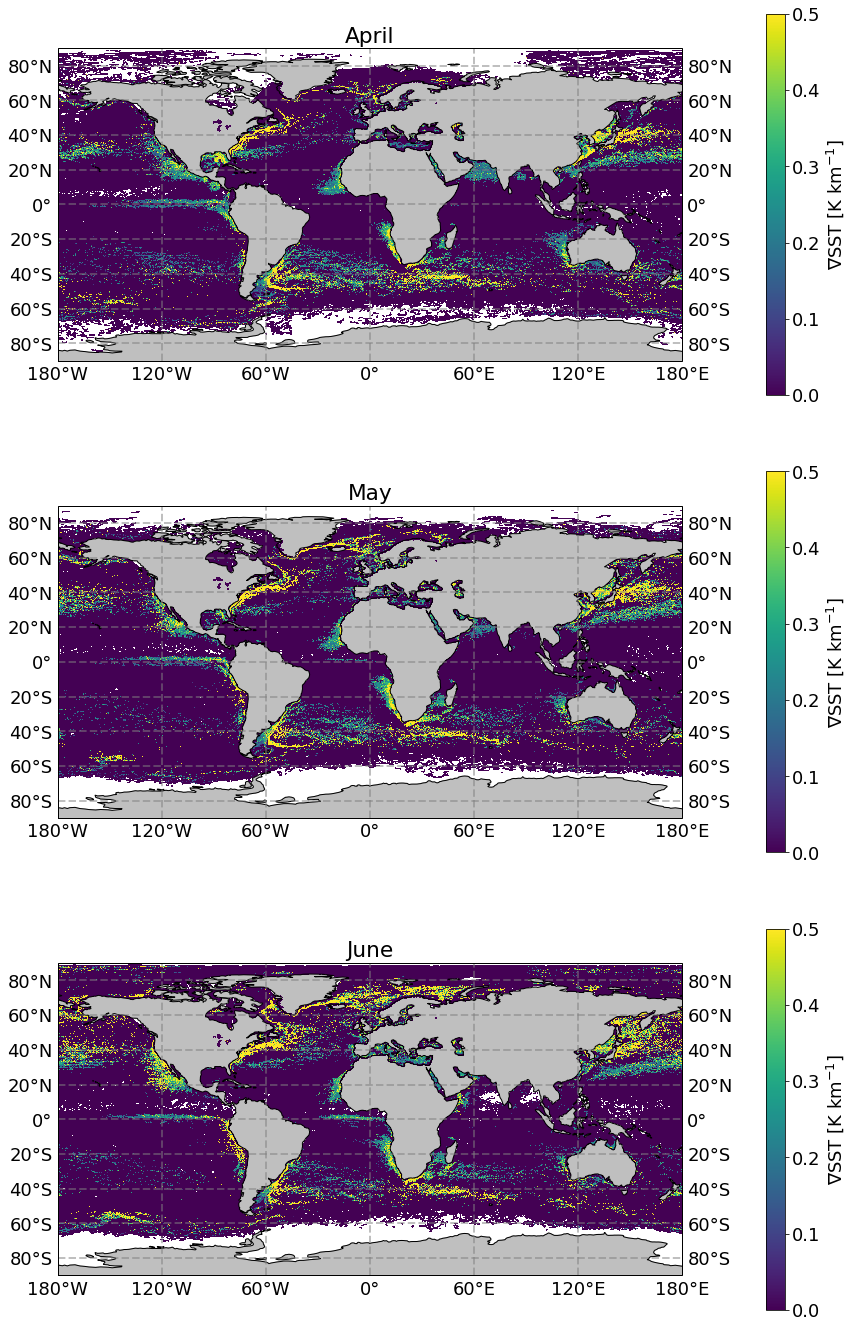

In [22]:
ds2_AMJ = ds2['clim_maxi_sst_gradient'].isel(time_month=[3,4,5])
str_month = ['April','May','June']
matplotlib.rcParams.update({'font.size':18})
fig = plt.figure(figsize=(13,20))
#plot SST
for i in range(3):
    ax = make_cartopy(3,1,projection=ccrs.PlateCarree(), fig=fig, resolution='110m',nfig=(i+1),Month_text = str_month[i] )
    cs=ax.pcolormesh(ds2_AMJ.lon,ds2_AMJ.lat,ds2_AMJ[i], vmax=vmax_grad,cmap = plt.get_cmap('viridis'))
    cbar = fig.colorbar(cs, ax=ax,pad =0.1)
    cbar.set_label(r'$\nabla$SST [K km$^{-1}$]')
plt.subplots_adjust(left=0.1,right=0.99,wspace=0.05,top=0.95, bottom =0.05)
plt.savefig(graphdir+'Atlas_SST_gradient_AMJ.png')


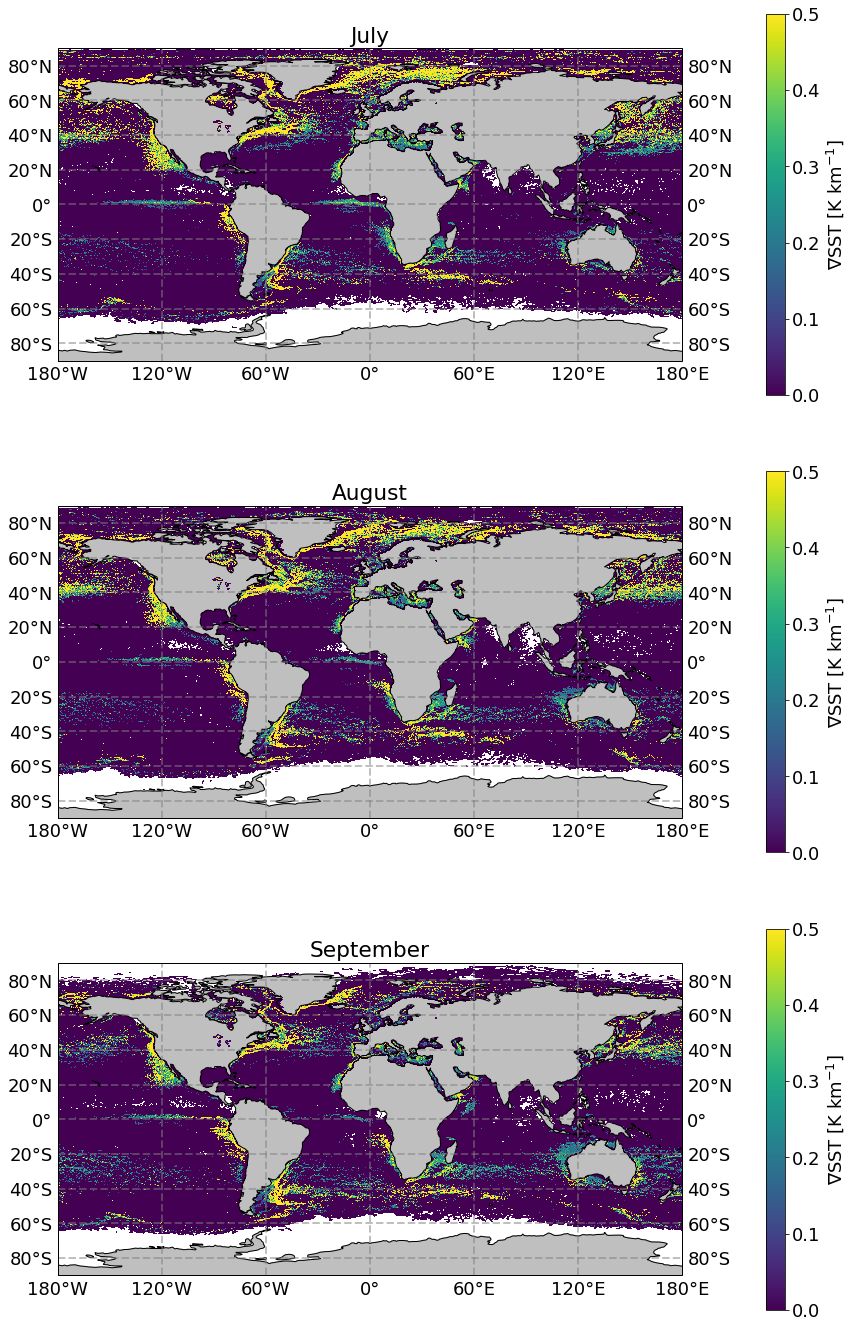

In [23]:
ds2_JAS = ds2['clim_maxi_sst_gradient'].isel(time_month=[6,7,8])
str_month = ['July','August','September']
matplotlib.rcParams.update({'font.size':18})
fig = plt.figure(figsize=(13,20))
#plot SST
for i in range(3):
    ax = make_cartopy(3,1,projection=ccrs.PlateCarree(), fig=fig, resolution='110m',nfig=(i+1),Month_text = str_month[i] )
    cs=ax.pcolormesh(ds2_JAS.lon,ds2_JAS.lat,ds2_JAS[i], vmax=vmax_grad,cmap = plt.get_cmap('viridis'))
    cbar = fig.colorbar(cs, ax=ax, pad=0.1)
    cbar.set_label(r'$\nabla$SST [K km$^{-1}$]')
plt.subplots_adjust(left=0.1,right=0.99,wspace=0.05,top=0.95, bottom =0.05)
plt.savefig(graphdir+'Atlas_SST_gradient_JAS.png')

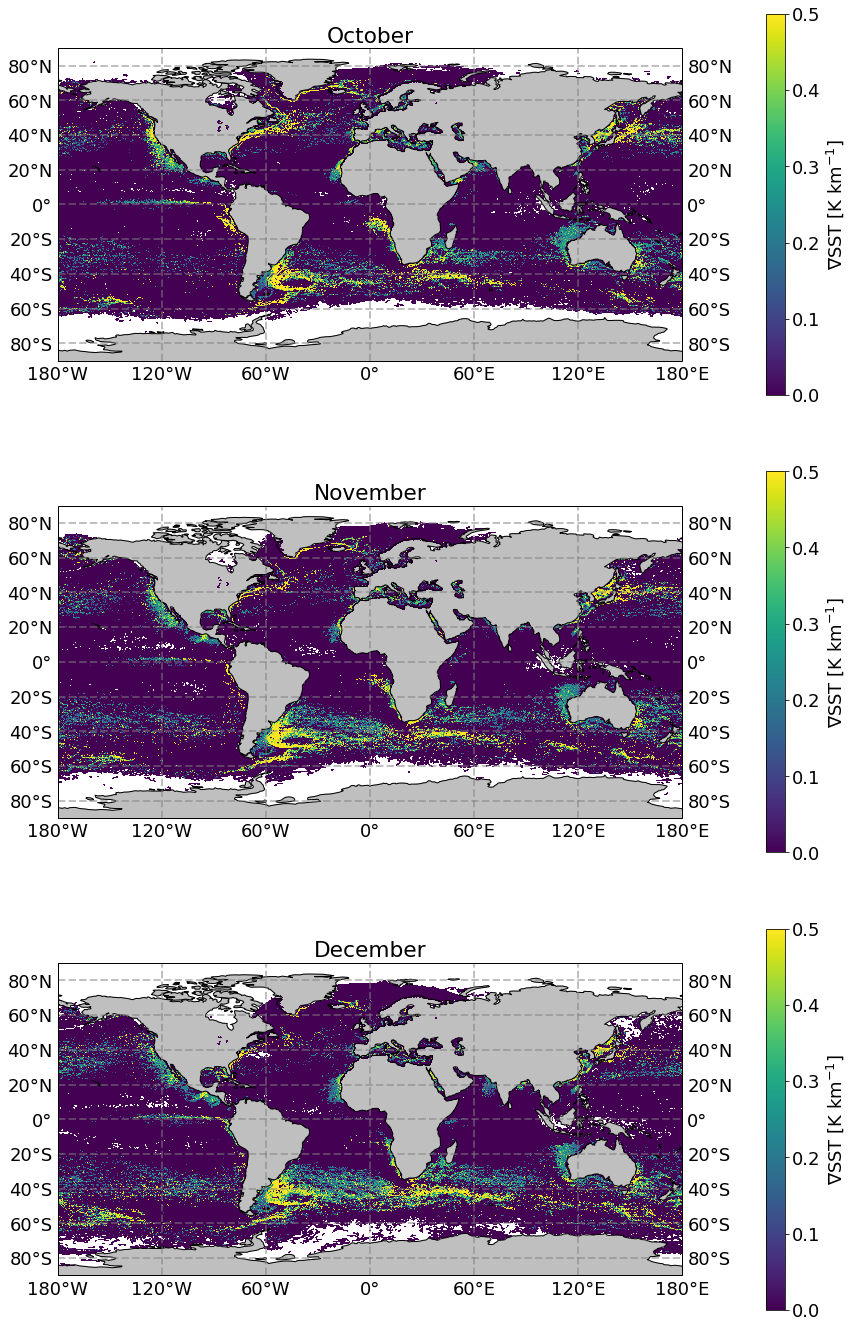

In [24]:
ds2_OND = ds2['clim_maxi_sst_gradient'].isel(time_month=[9,10,11])
str_month = ['October','November','December']
matplotlib.rcParams.update({'font.size':18})
fig = plt.figure(figsize=(13,20))
#plot SST
for i in range(3):
    ax = make_cartopy(3,1,projection=ccrs.PlateCarree(), fig=fig, resolution='110m',nfig=(i+1),Month_text = str_month[i] )
    cs=ax.pcolormesh(ds2_OND.lon,ds2_OND.lat,ds2_OND[i], vmax=vmax_grad,cmap = plt.get_cmap('viridis'))
    cbar = fig.colorbar(cs, ax=ax,pad=0.1)
    cbar.set_label(r'$\nabla$SST [K km$^{-1}$]')
plt.subplots_adjust(left=0.1,right=0.99,wspace=0.05,top=0.95, bottom =0.05)
plt.savefig(graphdir+'Atlas_SST_gradient_OND.png')

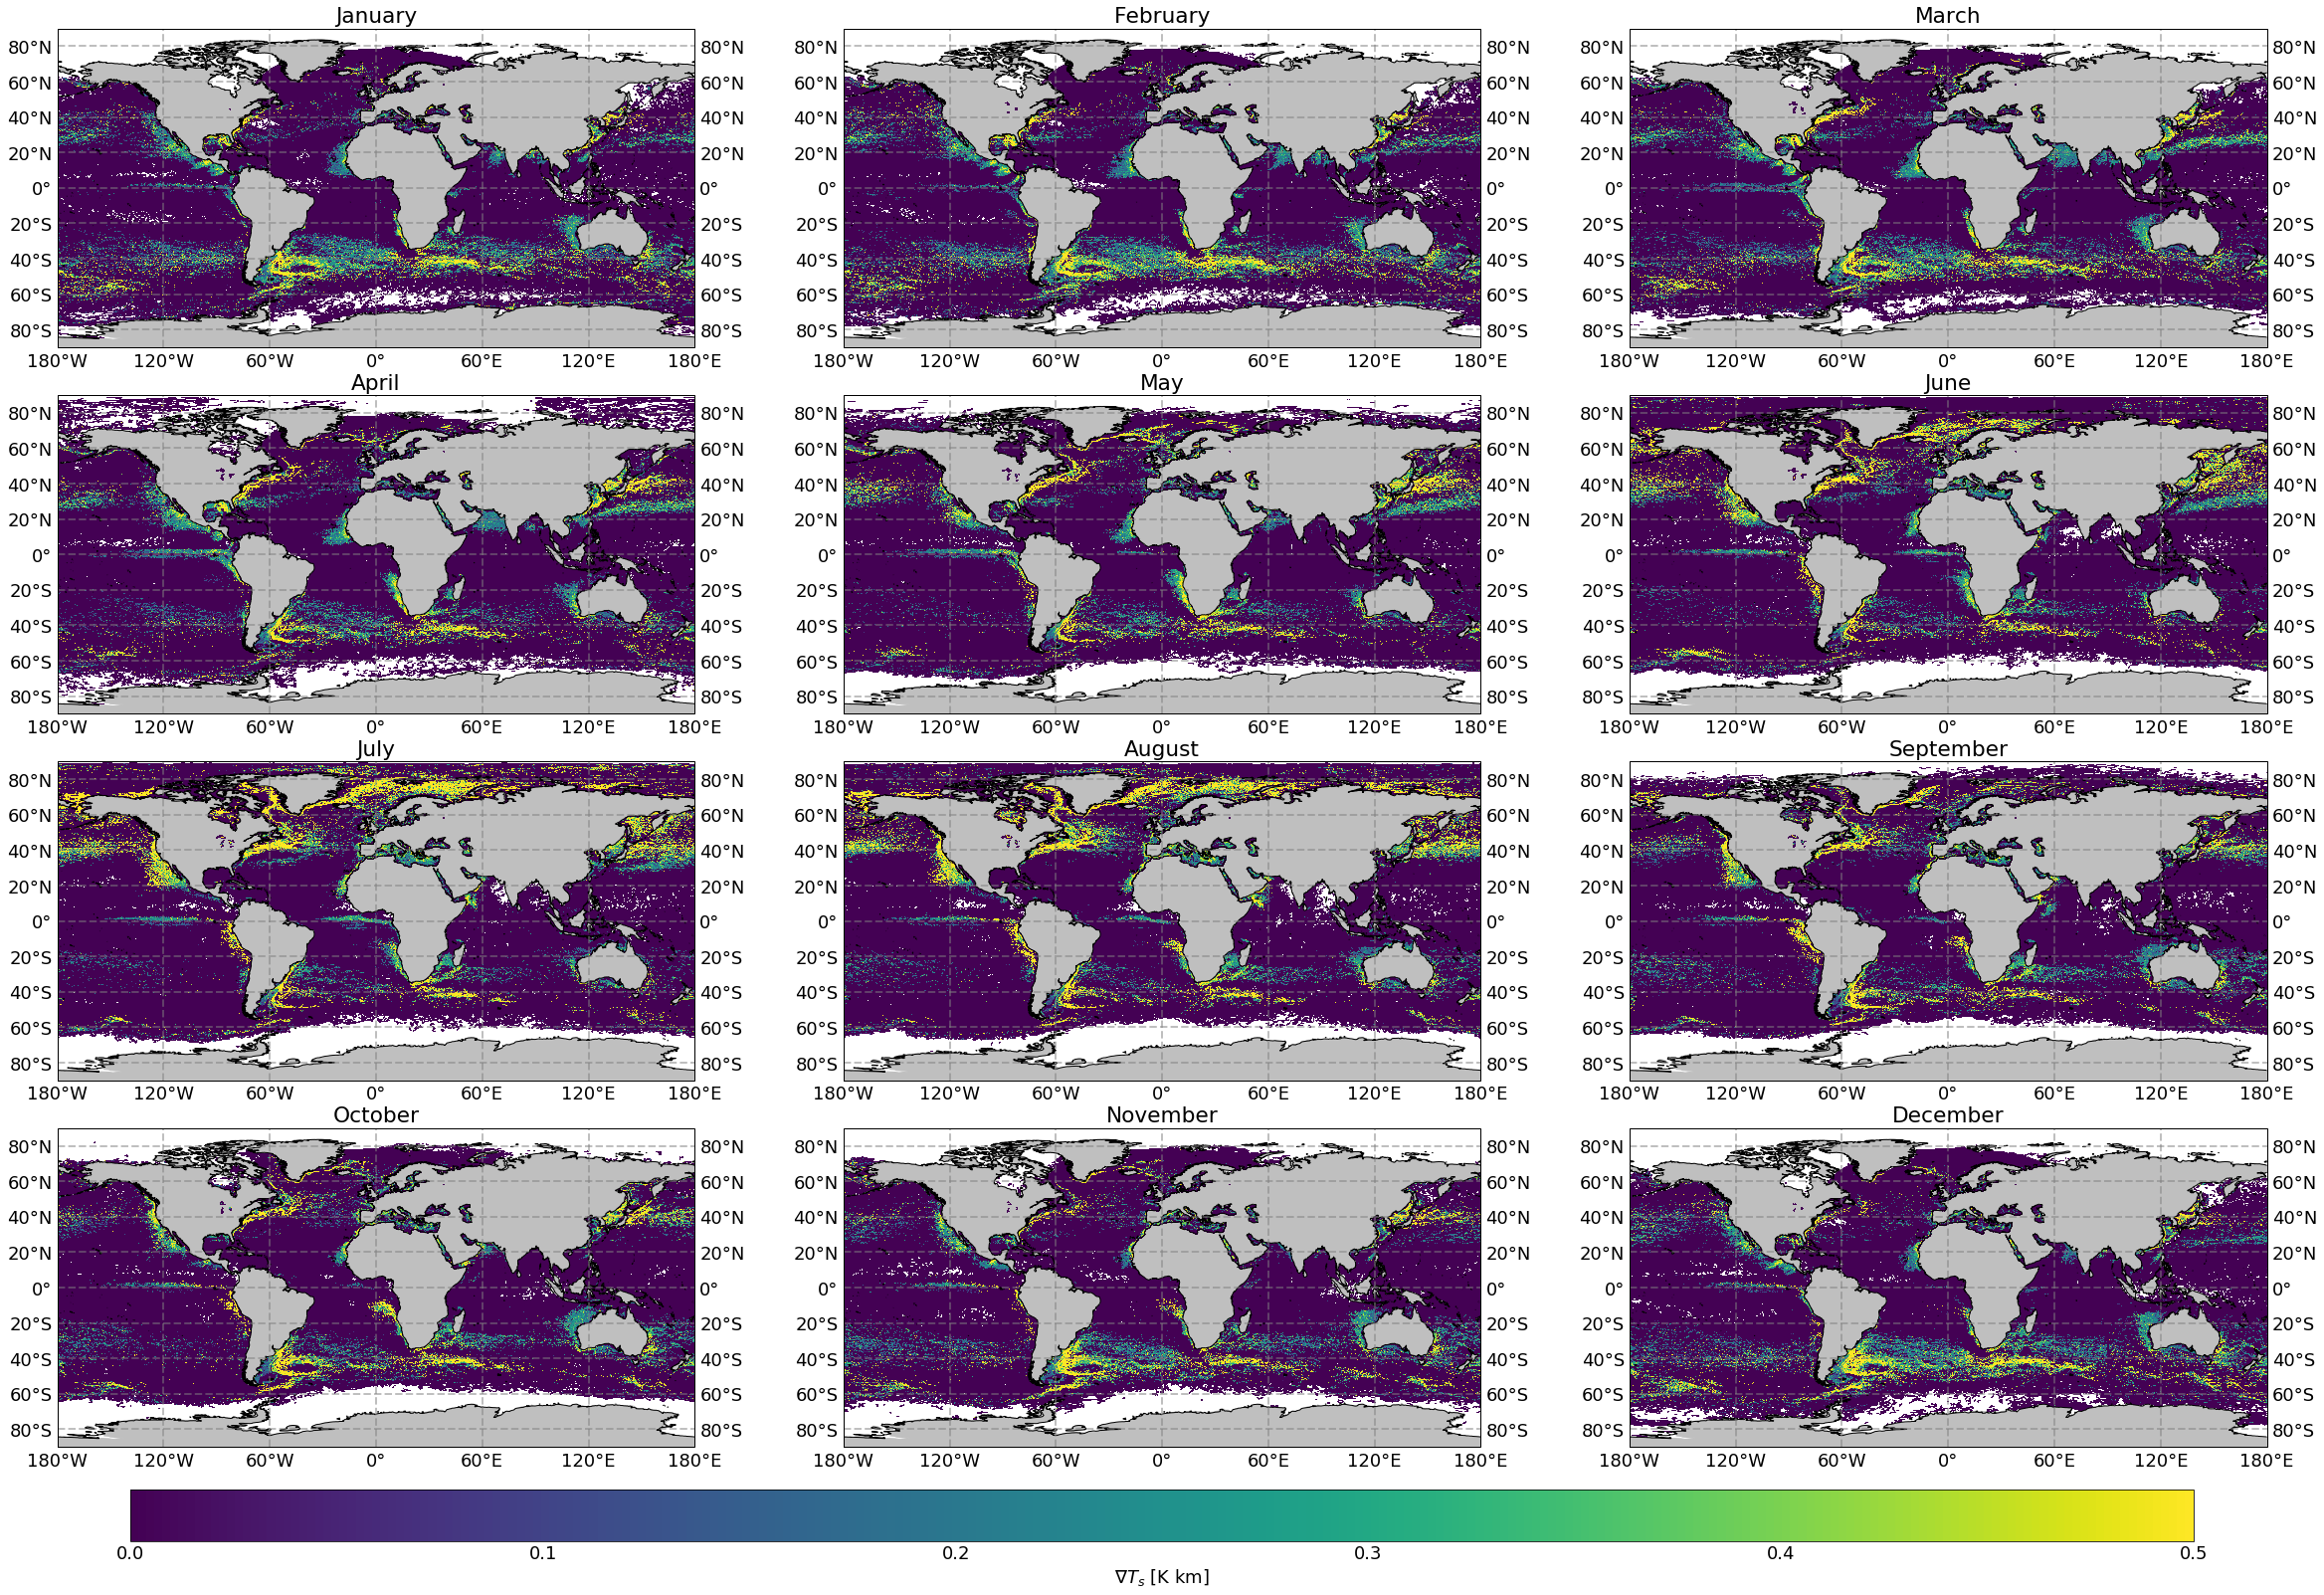

In [25]:
matplotlib.rcParams.update({'font.size':18})
fig = plt.figure(figsize=(36, 24))
vmin=0
vmax=1
str_month = ['January','February','March','April','May','June','July','August','September','October','November','December']

for i in range(12):
    ax = make_cartopy(4,3,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=(i+1),Month_text = str_month[i] )
    cs=ax.pcolormesh(ds2.lon,ds2.lat,ds2.clim_maxi_sst_gradient.isel(time_month =i), vmax=vmax_grad,cmap = plt.get_cmap('viridis'))
    #cbar = fig.colorbar(cs, ax=ax,pad=0.1)
    #cbar.set_label(r'$\nabla$SST [K km$^{-1}$]')


# Add axes to the figure, to place the colour bar
colorbar_axes = fig.add_axes([0.1, 0.07, 0.8, 0.03])

# Add the colour bar
cbar = plt.colorbar(cs, colorbar_axes, orientation='horizontal')

# Label the colour bar and add ticks
cbar.set_label(r'$\nabla T_s$ [K km]')
cbar.ax.tick_params(length=0)
plt.subplots_adjust(left=0.05,right=0.95,hspace=0.15,wspace=0.05,top=0.95)
plt.savefig(graphdir+'Atlas_SST_gradient.png')


In [26]:
max_max_clim = ds2['clim_maxi_sst_gradient'].mean('time_month').persist()
print(max_max_clim)

<xarray.DataArray 'clim_maxi_sst_gradient' (lat: 2048, lon: 4096)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float32 -179.95605 -179.86816 -179.78027 -179.69238 ...
  * lat      (lat) float32 89.956055 89.868164 89.78027 89.69238 89.60449 ...


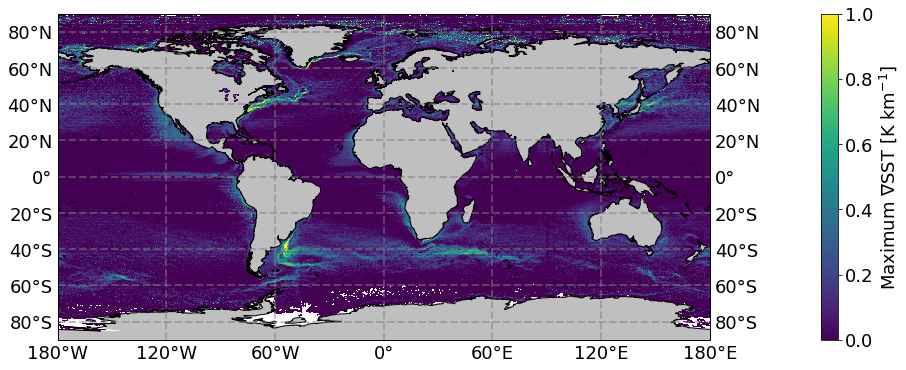

In [27]:
fig = plt.figure(figsize=(20,6))

ax = make_cartopy(1,1,projection=ccrs.PlateCarree(), fig=fig, resolution='50m',nfig=1)
cs=ax.pcolormesh(ds2.lon,ds2.lat,max_max_clim, vmax=1,cmap = plt.get_cmap('viridis'))
cbar = fig.colorbar(cs, ax=ax,pad=0.1)
cbar.set_label(r'Maximum $\nabla$SST [K km$^{-1}$]')
plt.savefig(graphdir+'Maximum_Atlas_SST_gradient.png')
